<a href="https://colab.research.google.com/github/jaearao/App-155/blob/master/ARAO__lab_assignment_module1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AP155 Lab Assignment**
## Module 1: Integrals and Derivatives

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.




### Student Information

_Full Name (Last Name, First Name)_: John Robert B. Arao \
_Student No._: 2022-01967 \
_Section_: TX-3

### Submission Information

_Date and Time Submitted (most recent upload)_: 9/20

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** John Robert B. Arao

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **XX**/100

Score breakdown:
* Problem 1 - XX/30
* Problem 2 - XX/30
* Problem 3 - XX/40

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

### PROBLEM 1
**Integration using the trapezoidal rule and Simpson's rule**

Calculate the integral of the function $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Do the numerical calculation using the trapezoidal rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(10 pts.)*

2. What are the percentage errors of your answers in (1)? *(10 pts.)*

3. Repeat the calculation using Simpson's rule with 10, 100, and 1,000 slices. Describe each step of the calculation clearly and concisely. *(5 pts.)*

4. What are the percentage errors of your answers in (3)? How do they compare with the results from (1) for the same number of slices? *(5 pts.)*

### Trapezoidal Rule
\begin{align}
        \text{I(a,b) = } &\int_a^b \mathrm{d}x \, f(x). \\[1em]
    \end{align}
\
\
Let h be the width and k is the index of the slice. Then, \

\begin{align}
          A_k = \frac{1h}{2} \sum_{1}^N [f(a+(k-1)h)+f(a+kh)]
        \end{align}


Expanding,

\begin{align}
          I(a,b) = h \left[\frac{1}{2}f(a) + \frac{1}{2}f(b) + \sum_{k=1}^{N-1} f(a+kh)\right]
        \end{align}

### Simpson's Rule

Consider points -h, 0, and h, we can fit it each point in the quadratic $ f(x) = Ax^2 + Bx + C$. Then, we can find the values of A, B, and C. The area under the curve will be given by:
\begin{align}
          &\int_{-h}^h dx\ (Ax^2 + Bx + C) = \frac{1}{3} h \left[f(-h) + 4f(0) +f(h) \right] \\
        \end{align}
Extending,

\begin{align}
          \text{I(a,b) ≃}\ \frac{1}{3} h \left[f(a) + f(b) + 4\sum_{k=1}^{\frac{N}{2}} f(a+(2k-1)h) + 2\sum_{k=1}^{\frac{N}{2}-1} f(a+2kh) \right]
       \end{align}

In [1]:
import numpy as np
def f(x):
  return 2*x**4 + 3*x**2 + 4*x + 5

#define the number of slice N
N = np.array([10 , 100 , 1000])

#define the lower bound
a = 0

#define the upper bound
b = 5


#define the width h using a for loop
h = []
for i in N:
    x = (b-a)/i
    h.append(x)

#use the expanded trapezoidal rule
I_trap =[]
#initiate by extracting each elements of N in a for loop
for k in range (1,len(N)+1):  #remember the syntax range(start, end-1)
  Num = N[k-1]  #extract the elements of N with a syntax of list indexing n-1
  s = 0.5*f(a) + 0.5*f(b) #define the initial value here
  for j in range (1, Num): #define the summation
    s += f(a+j*h[k-1])
  Ij = h[k-1]*s
  I_trap.append(Ij)

#use the simpson's rule
I_simp = []
for k in range (1,len(N)+1):
  Num = N[k-1]
  s = f(a) + f(b)
  for l in range (1, (Num//2)+1):
    s += 4*f(a+(2*l-1)*h[k-1])
  for m in range (1, (Num//2)):
    s += 2*f(a+2*m*h[k-1])
  Ik = 1/3*h[k-1]*s
  I_simp.append(Ik)


#define the answer
ans = 1450

#compute the percent error for trapezoidal rule
err_trap = []
for i in range(1, len(I_trap)+1):
  er = abs((ans-I_trap[i-1])/ans)*100
  err_trap.append(er)

#compute the percent error for simpson's rule
err_simp = []
for i in range(1, len(I_simp)+1):
  er = abs((ans-I_simp[i-1])/ans)*100
  err_simp.append(er)

#print the results
print('For items 1 & 2,')
for i in range(1, len(I_trap)+1):
  print('The definite integral using the trapezoidal rule with slice '
        + str(N[i-1])+ ' is: '
        + str(I_trap[i-1])
        + ' with a percent error of '
        + str(err_trap[i-1]) + '%.')

print('')


print('For items 3 & 4,')
for i in range(1, len(I_simp)+1):
  print('The definite integral using the Simpson\'s rule with slice '
        + str(N[i-1])+ ' is: '
        + str(I_simp[i-1])
        + ' with a percent error of '
        + str(err_simp[i-1]) + '%.')




For items 1 & 2,
The definite integral using the trapezoidal rule with slice 10 is: 1471.4375 with a percent error of 1.478448275862069%.
The definite integral using the trapezoidal rule with slice 100 is: 1450.2145812500003 with a percent error of 0.014798706896569988%.
The definite integral using the trapezoidal rule with slice 1000 is: 1450.0021458331234 with a percent error of 0.00014798849127240326%.

For items 3 & 4,
The definite integral using the Simpson's rule with slice 10 is: 1450.0833333333333 with a percent error of 0.005747126436776382%.
The definite integral using the Simpson's rule with slice 100 is: 1450.0000083333337 with a percent error of 5.747126657485657e-07%.
The definite integral using the Simpson's rule with slice 1000 is: 1450.000000000834 with a percent error of 5.75176994155707e-11%.


### Interpretation

> In terms of accuracy, we can observe the *trapezoidal rule* to have a **significantly higher approximation error** than the *Simpson's rule.* This is expected as the given function is in the fourth degree polynomial, and Simpson's rule is made for curves. Likewise, trapezoidal rule will be significantly accurate in a trapezoid-like functions.



> On the number of slices, **a higher number of slice yields to a lesser approximation error**. This is observed in both rules since having more points considers more changes in the function.

### PROBLEM 2

**Integration using Gaussian quadrature**

Calculate the integral from Problem 1 using the Gaussian quadrature method: $ 2x^4 + 3x^2 + 4x + 5$ from $x=0$ to $x=5$.

1. Define the function $\tt gaussxw$ from Appendix E of the Newman text (and run the cell). *(10 pts.)*

2. Calculate the integral using the $\tt gaussxw$ function in (1) and number of slices $N = 3$. Describe each step in the calculation clearly and concisely. *(20 pts.)*

In [2]:
from numpy import ones, copy, cos, tan, pi, linspace

def gaussxw(N):
    # Initial approximation to roots of the Legendre polynomial
    a = linspace(3,4*N-1,N)/(4*N+2)
    x = cos(pi*a+1/(8*N*N*tan(a)))
    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta > epsilon:
        p0 = ones(N,float)
        p1 = copy(x)
        for k in range(1,N):
          p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    return x,w

def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

In [3]:
# define the given function
def f(x):
  return 2*x**4 + 3*x**2 + 4*x + 5

#Input the given conditions
N = 3
a = 0.0
b = 5.0

#calculate the sample points and weights, then map them
#to the required integration domain
x,w = gaussxw(N) #call the gaussxw function
xp = 0.5*(b-a)*x + 0.5*(b+a)
wp = 0.5*(b-a)*w

#initiate the integration
s = 0.0 #assign the initial value of the integration
for k in range (0,N):
  s += wp[k]*f(xp[k]) #add all the values of the functions with their corresponding weights
print(s)

1450.000000000002


### PROBLEM 3

**Physics Application: Anharmonic Oscillator**

_Refer to Exercise 5.10 of the Newman text._ Consider an anharmonic oscillator with potential $V(x)$ symmetric about $x = 0$. Let us set our anharmonic oscillator going with amplitude $a$. That is, at $t = 0$ we release it from rest at position $x = a$ and it swings back towards the origin. Then at $t = 0$ we have $dx/dt = 0$ and the equation for its total energy becomes $E = V(a)$, i.e., the total energy of the particle is given in terms of the amplitude.

When the particle reaches the origin for the first time, it has gone through one quarter of a period of the oscillator. The period $T$ is given by: $$ T = \sqrt{8m} \int_0^a \frac{dx}{\sqrt{V(a)-V(x)}}. $$

1. Suppose the potential is $V(x) = x^4$ and the mass of the particle is $m = 1$. Write a Python function that calculates the period of the oscillator for given amplitude a using Gaussian quadrature with $N = 20$ points. Describe each step clearly and concisely. *(20 pts.)*

2. Use your function to make a graph of the period for amplitudes ranging from $a = 0$ to $a = 2$. Describe the behavior you find and explain these results clearly and concisely. *(20 pts.)*

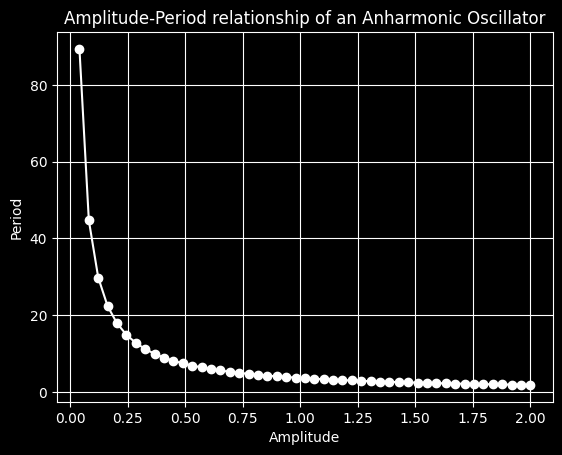

In [ ]:
import matplotlib.pyplot as plt
plt.style.context('dark_background') #Add a style to the graph for later

def V(x): # define the function V(x)
  return x**4

def T(x): #define the function of period T(x)
  return ((8*m)**(1/2))/((V(b)-V(x))**(1/2))

m = 1                           #assign the mass m from the given
B = np.linspace(0,2, num = 50)  #produce a list of numbers with the range 0 to 2 with 50 equal spaces
N = 20                          #assign the N of the Gaussian quadrature from the given
a = 0                           #assign the lower bound of the integration a as zero

h = []                          #make a null list to store all the integration with varying end points
for i in range(2,len(B)+1): #remove zero from the data since it will be undefined
  b = B[i-1]                #extract the values of B to act as b in the guassianxwab function
  x,w = gaussxwab(N,a,b)    #call the guassianwxab function
  xp = 0.5*(b)*x + 0.5*(b)
  wp = 0.5*(b)*w
  s = 0                     #assign the initial value of the integration
  for k in range (0,N):     #initiate the integration
    s += w[k]*T(x[k])       #calculate the value of the integration
  h.append(s)               #store the integration to the list h

B = B[1:len(B)]                               #slice the array B to remove the zero as it was undefined in the integration
plt.plot(B, h, marker="o", color = 'white')   #initiate the plo with amplitude as the x axis and period as the y axis; customize the plot
plt.xlabel('Amplitude')
plt.ylabel('Period')
plt.title('Amplitude-Period relationship of an Anharmonic Oscillator')
plt.grid(True)
plt.show()


### Results

- Based from the graph, there is an inverese relationship with the period and amplitude of an anharmonic oscillator. This is expected since the difference of V(a) and V(x) as a approaches infinity would push the value of the integrand to zero.

>  From here, we can infer that the wave would move so much faster with higher amplitudes as the total energy rises.